In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [237]:
import warnings
warnings.filterwarnings('ignore')

In [238]:
df = pd.read_excel("aspiring_minds_employability_outcomes_2015.xlsx")

In [239]:
pd.set_option("display.max_columns", None)

In [240]:
# head
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [241]:
# shape
df.shape

(3998, 39)

In [242]:
# description

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [244]:
# dropping Unnamed feature as its of no significance
df = df.drop(["Unnamed: 0"],axis=1)
df.dtypes

ID                                int64
Salary                            int64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64


In [245]:
# dropping ID column
df = df.drop(["ID"],axis=1)

# Univariate Analysis

<AxesSubplot:xlabel='Salary', ylabel='Density'>

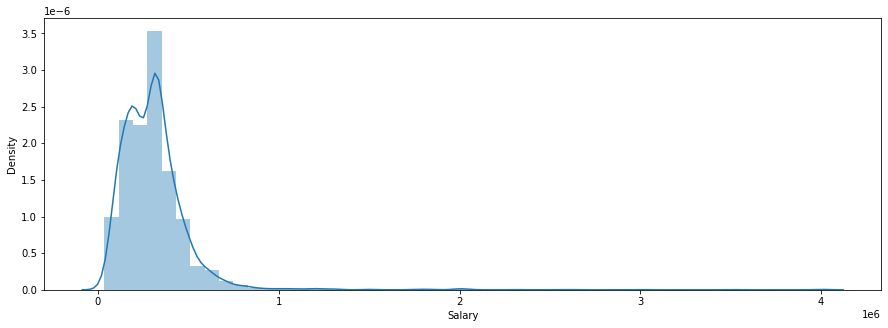

In [246]:
plt.figure(figsize=(15,5))
colors = sns.color_palette('bright',n_colors=2)
sns.distplot(df["Salary"])

In [247]:
df["Salary"].skew()

6.451081166224832

<AxesSubplot:xlabel='Salary', ylabel='Count'>

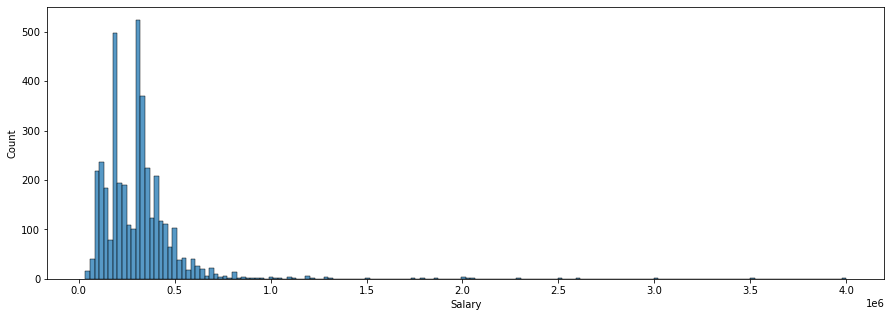

In [248]:
plt.figure(figsize=(15,5))
sns.histplot(df["Salary"])

- We can observe from the above plot that Salary is highly skewd to Right

In [249]:
num = df.select_dtypes(include="number")
categorical = df.select_dtypes(include="object")
dt_col = df.select_dtypes(include="datetime")
num.shape, categorical.shape, dt_col.shape 

((3998, 26), (3998, 9), (3998, 2))

In [250]:
num.columns

Index(['Salary', '10percentage', '12graduation', '12percentage', 'CollegeID',
       'CollegeTier', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

(array([ 12.,  50., 132., 240., 446., 636., 811., 850., 677., 144.]),
 array([43.   , 48.476, 53.952, 59.428, 64.904, 70.38 , 75.856, 81.332,
        86.808, 92.284, 97.76 ]),
 <BarContainer object of 10 artists>)

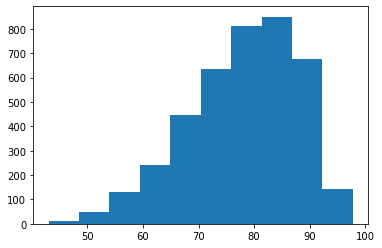

In [251]:
plt.hist(df["10percentage"])

In [252]:
df["10percentage"].value_counts(bins=10)

(81.332, 86.808]    850
(75.856, 81.332]    811
(86.808, 92.284]    677
(70.38, 75.856]     636
(64.904, 70.38]     446
(59.428, 64.904]    240
(92.284, 97.76]     144
(53.952, 59.428]    132
(48.476, 53.952]     50
(42.944, 48.476]     12
Name: 10percentage, dtype: int64

- Most of the people fall under the % rnge of 75-86

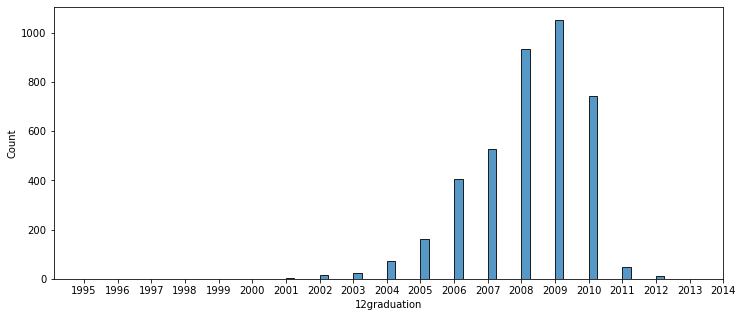

In [253]:
# plt.figure(figsize=(20,5))
fig,ax = plt.subplots(figsize=(12,5))
sns.histplot(df["12graduation"],ax=ax)
# ax.set_xlim(1995,2012)
ax.set_xticks(range(1995,2015))
plt.show()

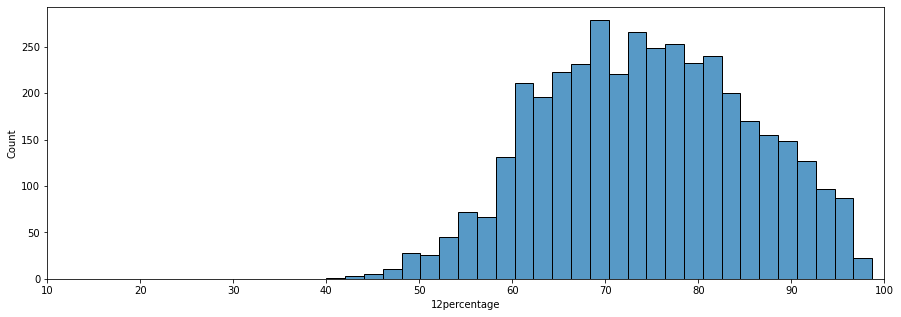

In [254]:
fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(df["12percentage"], ax=ax)
ax.set_xlim(10,100)
plt.show()

- Most of the peopple gratuated between the years 2008 to 2010.
- Many of them having 12th percentage of aroung 65% to 82%

In [255]:
num["CollegeID"].value_counts()

272      94
64       38
11759    35
44       35
47       33
         ..
6604      1
4557      1
12755     1
7821      1
6143      1
Name: CollegeID, Length: 1350, dtype: int64

In [256]:
print(num["CollegeID"].nunique)

<bound method IndexOpsMixin.nunique of 0        1141
1        5807
2          64
3        6920
4       11368
        ...  
3993     6268
3994     4883
3995     9786
3996      979
3997     6609
Name: CollegeID, Length: 3998, dtype: int64>


- From above results of CollegeID, there are 1350 unique colleges to which students had attended.
- Of which, highest number of students(94) had attended college with ID-272

<AxesSubplot:xlabel='CollegeTier', ylabel='count'>

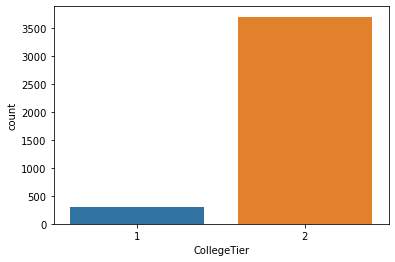

In [257]:
sns.countplot(num["CollegeTier"])

In [258]:
num["CollegeTier"].value_counts()

2    3701
1     297
Name: CollegeTier, dtype: int64

In [259]:
print((3701/3998)*100)
print((297/3998)*100)

92.57128564282141
7.42871435717859


- In the given dataset, ariund 93% colleges are tier-2 and only 7% are tier-1

In [260]:
num["collegeGPA"].value_counts()

70.00    112
72.00     99
75.00     83
65.00     79
68.00     75
        ... 
93.30      1
60.19      1
57.25      1
61.44      1
61.47      1
Name: collegeGPA, Length: 1282, dtype: int64

<AxesSubplot:xlabel='collegeGPA', ylabel='Density'>

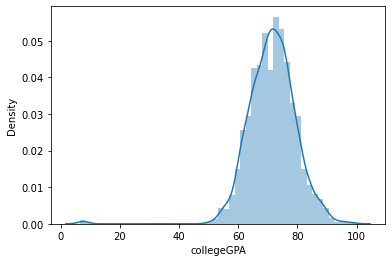

In [261]:
sns.distplot(num["collegeGPA"])

- collegeGPA is highly left skewed.
- Most of the colleges having CGPA between 65% to 72%.
- Very less colleges having CGPA above 85%

In [262]:
num["CollegeCityID"].value_counts()

272      94
64       38
11759    35
44       35
47       33
         ..
6604      1
4557      1
12755     1
7821      1
6143      1
Name: CollegeCityID, Length: 1350, dtype: int64

In [263]:
np.corrcoef(num["CollegeCityID"],num["CollegeID"])

array([[1., 1.],
       [1., 1.]])

- CollegeCityID and CollegeID are having correlation of 1.
- Hence, drop 1 of these 2 columns.

In [264]:
np.corrcoef(num["CollegeCityTier"],num["CollegeTier"])

array([[ 1.        , -0.10149374],
       [-0.10149374,  1.        ]])

<AxesSubplot:xlabel='CollegeCityTier', ylabel='count'>

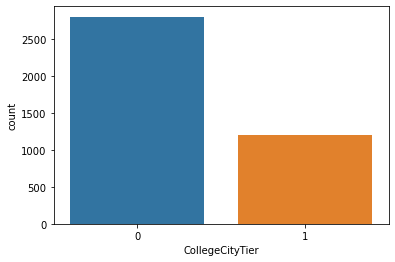

In [265]:
sns.countplot(num["CollegeCityTier"])

In [266]:
num["CollegeCityTier"].value_counts()

0    2797
1    1201
Name: CollegeCityTier, dtype: int64

- Aroung 69% of colleges are located in Tier-0 city.

## Column: GraduationYear

<AxesSubplot:xlabel='GraduationYear', ylabel='count'>

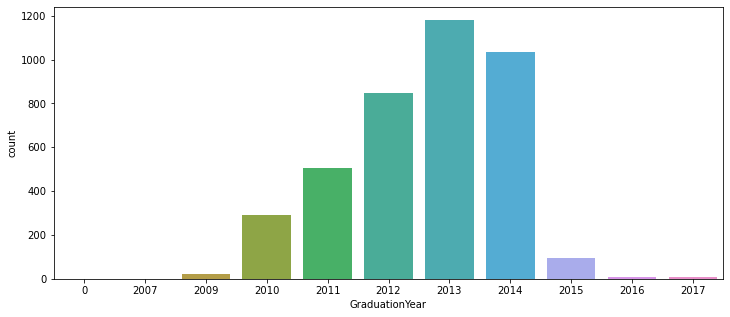

In [267]:
fix,ax = plt.subplots(figsize=(12,5))
sns.countplot(num["GraduationYear"])

- This dataset contains people gratuated betwween years 2009 and 2017.
- Highest graduation % is in 2013.
- Least in 2016,2017
- Also some valeues are 0, which are missing values. e can impute it wwith mode.

In [268]:
sub =['English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience','MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg','conscientiousness', 'agreeableness', 'extraversion', 'nueroticism','openess_to_experience']

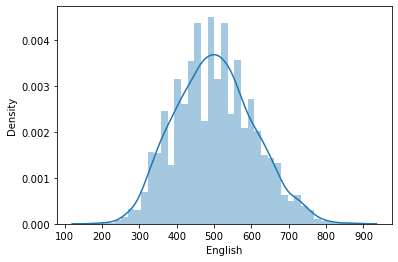

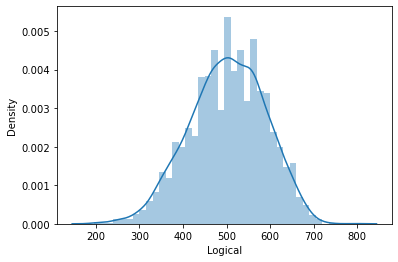

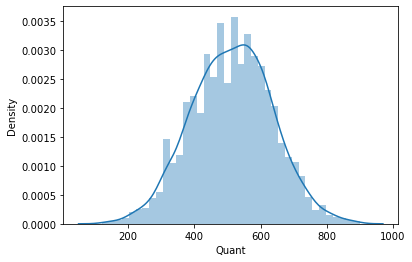

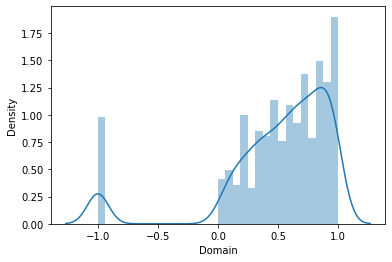

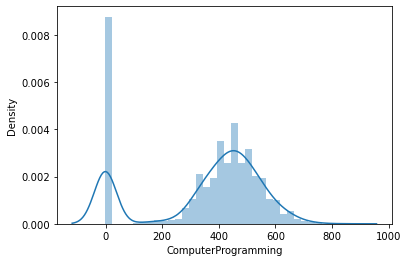

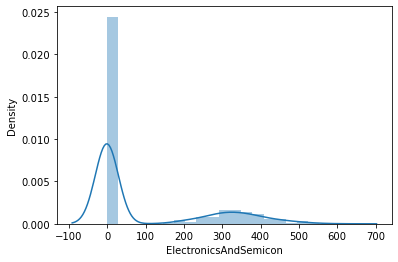

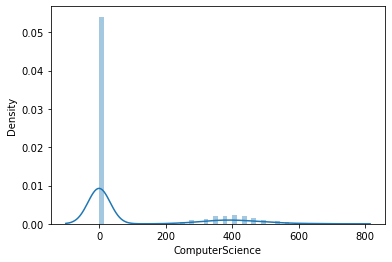

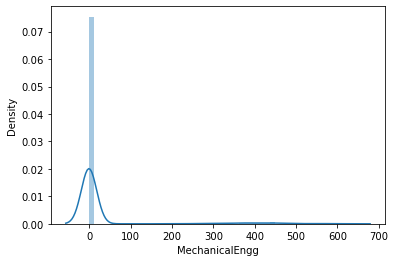

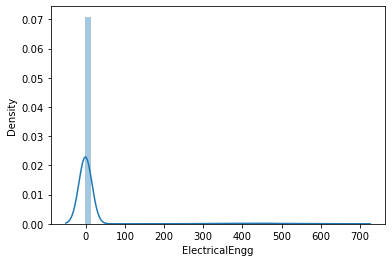

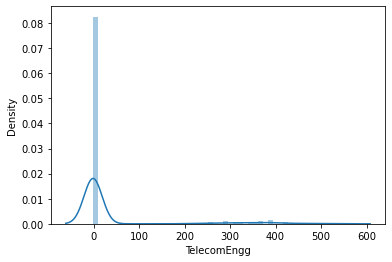

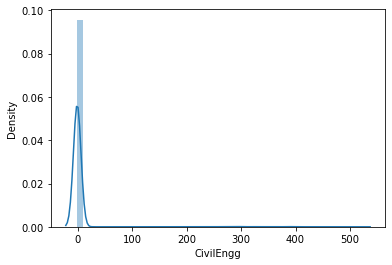

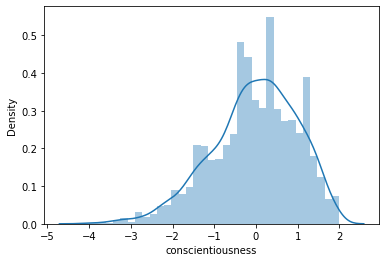

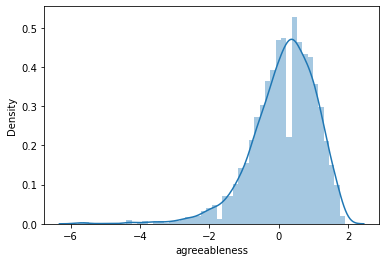

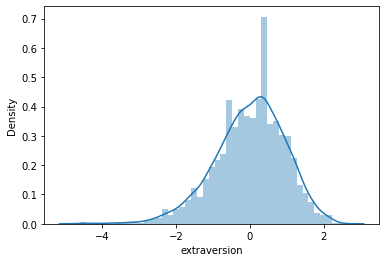

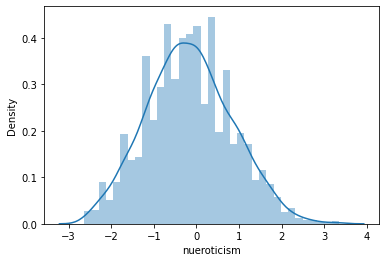

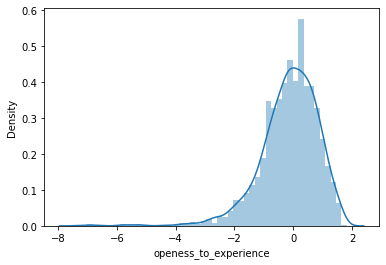

In [269]:
for i in sub:
    plt.figure()
    sns.distplot(num[i])
plt.show()

In [270]:
### To find the anomolities in data
for i in num.columns:
    print('*'*20,i,'*'*20)
    print(num[i].unique())

******************** Salary ********************
[ 420000  500000  325000 1100000  200000  300000  400000  600000  230000
  450000  270000  350000  250000  120000  320000  190000  180000  335000
  435000  345000  145000  220000  530000  340000  360000  215000   80000
  330000  380000  110000  205000   95000  390000   60000  240000  525000
  305000  150000  310000  455000  800000  100000  280000  445000  315000
  370000  275000 1500000  425000  470000  460000  510000  480000  170000
  640000  225000  440000 1200000  675000  105000  195000  385000  235000
  615000  290000  140000  405000 1860000  375000  430000  660000   70000
  410000  550000   35000  115000  415000  265000  285000  245000  395000
  560000  700000  185000  160000  625000   85000  135000  785000  210000
  155000  355000  535000  690000  260000 1110000 1000000  505000  475000
  715000  820000   90000  720000 2600000  515000   55000  495000   65000
  655000  545000  520000  645000 1025000  775000  490000 1300000 3500000
  

In [271]:
# GraduationYear - 0
# Domain - -1
# ComputerProgramming - -1
# ElectronicsAndSemicon - -1
# ComputerScience - -1
# MechanicalEngg  - -1
# ElectricalEngg - -1
# TelecomEngg - -1
# CivilEngg - -1

# All these are missing values which need to be imputed.

###  Impute GraduationYear with mode

In [272]:
num["GraduationYear"].replace(0,num["GraduationYear"].mode()[0], inplace=True)
num["GraduationYear"].value_counts()

2013    1182
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
2007       1
Name: GraduationYear, dtype: int64

In [273]:
num.isin([0,'Nan']).sum()

Salary                      0
10percentage                0
12graduation                0
12percentage                0
CollegeID                   0
CollegeTier                 0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier          2797
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                      0
ComputerProgramming         0
ElectronicsAndSemicon       0
ComputerScience             0
MechanicalEngg              0
ElectricalEngg              0
TelecomEngg                 0
CivilEngg                   0
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
openess_to_experience       0
dtype: int64

In [274]:
# drop CollegeCityTier as 70% values are missing
num = num.drop("CollegeCityTier",axis=1)

In [275]:
# drop CollegeCityID as CollegeCityID and CollegeID have perfect positive linear relationship.
num = num.drop("CollegeCityID",axis=1)

In [276]:
num.isin([-1]).sum()

Salary                      0
10percentage                0
12graduation                0
12percentage                0
CollegeID                   0
CollegeTier                 0
collegeGPA                  0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
openess_to_experience       0
dtype: int64

- Considering -1 as the marks given to those who have't opted for those subjects. Leaving them as is instead of imputing

## Categorical columns

In [284]:
categorical.columns

Index(['DOL', 'Designation', 'JobCity', 'Gender', '10board', '12board',
       'Degree', 'Specialization', 'CollegeState'],
      dtype='object')

In [285]:
categorical['DOL'].value_counts()

present                1875
2015-04-01 00:00:00     573
2015-03-01 00:00:00     124
2015-05-01 00:00:00     112
2015-01-01 00:00:00      99
                       ... 
2009-06-01 00:00:00       1
2011-08-01 00:00:00       1
2010-02-01 00:00:00       1
2008-03-01 00:00:00       1
2010-10-01 00:00:00       1
Name: DOL, Length: 67, dtype: int64

- DOL should be of datetime dtype.
- Values with 'present' can be replaced with todays date and converted to date type.
- As timesta,p of DOL is not required, only date can be trimmed and stored.

In [286]:
df.dtypes

Salary                            int64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64
Domain                          float64


In [287]:
categorical["DOL"].replace("present",dt.datetime.today(),inplace=True)
categorical['DOL'] = pd.to_datetime(categorical['DOL'])

- drop DOL and from categorical and concatenate to dt_col dataframe

In [288]:
DOL = categorical['DOL']
dt_col = dt_col.join(DOL)

In [289]:
categorical.drop('DOL',axis=1,inplace=True)

In [290]:
categorical.columns

Index(['Designation', 'JobCity', 'Gender', '10board', '12board', 'Degree',
       'Specialization', 'CollegeState'],
      dtype='object')

## Column: Designation 

In [291]:
categorical['Designation'].value_counts()

software engineer               539
software developer              265
system engineer                 205
programmer analyst              139
systems engineer                118
                               ... 
teradata developer                1
logistics executive               1
project administrator             1
digital marketing specialist      1
software eng                      1
Name: Designation, Length: 419, dtype: int64

In [292]:
for i in categorical.columns:
    print('*'*20,i,'*'*20)
    print(categorical[i].unique())

******************** Designation ********************
['senior quality engineer' 'assistant manager' 'systems engineer'
 'senior software engineer' 'get' 'system engineer'
 'java software engineer' 'mechanical engineer' 'electrical engineer'
 'project engineer' 'senior php developer' 'senior systems engineer'
 'quality assurance engineer' 'qa analyst' 'network engineer'
 'product development engineer' 'associate software developer'
 'data entry operator' 'software engineer' 'developer'
 'electrical project engineer' 'programmer analyst' 'systems analyst'
 'ase' 'telecommunication engineer' 'application developer'
 'ios developer' 'executive assistant' 'online marketing manager'
 'documentation specialist' 'associate software engineer'
 'management trainee' 'site manager' 'software developer' '.net developer'
 'production engineer' 'jr. software engineer'
 'trainee software developer' 'ui developer' 'assistant system engineer'
 'android developer' 'customer service' 'test engineer' 'jav

- There are values with designation as get which is a missing value.
- Impute with mode.

In [293]:
categorical[categorical['Designation']=="get"][['Designation','Specialization']]

,Designation,Specialization
4,get,electronics and communication engineering
332,get,mechanical and automation
350,get,electrical engineering
1717,get,mechanical engineering
1897,get,mechanical engineering
2140,get,mechanical engineering
2318,get,electronics and electrical engineering
2443,get,mechanical engineering
2666,get,electronics and electrical engineering
2757,get,mechanical engineering


In [294]:
#mode value for mech
mech = categorical[categorical['Specialization'].isin(['mechanical engineering','mechanical and automation'])]['Designation'].mode()[0]
#mode value for eee
eee = categorical[categorical['Specialization']==('electronics and electrical engineering')]['Designation'].mode()[0]
print(mech, eee)

production engineer system engineer


In [295]:
# Impute with respective modes
#mechanical
categorical.loc[categorical['Specialization'].isin(['mechanical engineering','mechanical and automation']),'Designation'].replace('get',mech,inplace=True)
#EEE
categorical['Designation'].replace('get',eee,inplace=True)

# Column: JobCity

- JobCity is having -1 values which are missing values.
- Also city names are duplicated/spelling mistakes.
- Impute -1 with mode and rectify the spelllings.

In [296]:
categorical['JobCity'].replace(-1,'unknown',inplace=True)
categorical['JobCity'].apply(lambda x:x.title())

0              Bangalore
1                 Indore
2                Chennai
3                Gurgaon
4                Manesar
              ...       
3993          New Delhi 
3994           Hyderabad
3995           Bangalore
3996    Asifabadbanglore
3997             Chennai
Name: JobCity, Length: 3998, dtype: object

In [297]:
### cleaning the column which have similar meaning but has spelling difference orelse it will effect the distribution.
categorical["JobCity"].replace("Bangalore","Bengaluru",inplace=True)
categorical["JobCity"].replace("Banaglore","Bengaluru",inplace=True)
categorical["JobCity"].replace("Chennai, Bangalore","Bengaluru",inplace=True)
categorical["JobCity"].replace(" Bangalore","Bengaluru",inplace=True)
categorical["JobCity"].replace("Bangalore ","Bengaluru",inplace=True)
categorical["JobCity"].replace("Banglore","Bengaluru",inplace=True)
categorical["JobCity"].replace("Jaipur ","Jaipur",inplace=True)
categorical["JobCity"].replace("Gandhinagar","Gandhi Nagar",inplace=True)
categorical["JobCity"].replace("Bangalore ","Bengaluru",inplace=True)
categorical["JobCity"].replace("Jaipur ","Jaipur",inplace=True)
categorical["JobCity"].replace("Gandhinagar","Gandhi Nagar",inplace=True)
categorical["JobCity"].replace("Hyderabad ","Hyderabad",inplace=True)
categorical["JobCity"].replace("Hyderabad(Bhadurpally)","Hyderabad",inplace=True)
categorical["JobCity"].replace("Bhubaneswar ","Bhubaneswar",inplace=True)
categorical["JobCity"].replace("Delhi/Ncr","Delhi",inplace=True)
categorical["JobCity"].replace("Nagpur ","Nagpur",inplace=True)
categorical["JobCity"].replace("Pune ","Pune",inplace=True)
categorical["JobCity"].replace("Trivandrum ","Trivandrum",inplace=True)
categorical["JobCity"].replace("Thiruvananthapuram","Trivandrum",inplace=True)
categorical["JobCity"].replace("Gurga","Gurgaon",inplace=True)
categorical["JobCity"].replace("GURAGAON","Gurgaon",inplace=True)
categorical["JobCity"].replace("vsakhapttnam","Visakhapatnam",inplace=True)
categorical["JobCity"].replace("Vizag","Visakhapatnam",inplace=True)
categorical["JobCity"].replace("SADULPUR,RAJGARH,DISTT-CHURU,RAJASTHAN","Rajasthan",inplace=True)
categorical["JobCity"].replace("latur (Maharashtra )","Latur",inplace=True)

In [298]:
categorical['JobCity'].mode()[0]

'Bengaluru'

In [299]:
# Replace JObCity = unknown with Bengaluru
categorical["JobCity"].replace("unknown","Bengaluru",inplace=True)

# Column: Gender

In [300]:
categorical["Gender"].value_counts()

m    3041
f     957
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

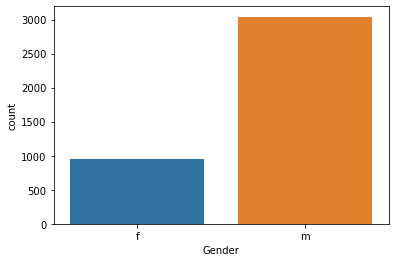

In [301]:
sns.countplot(categorical["Gender"])

- From the above plot it's evident that 76 % are male and only 24% are female

# Column: 10board

- "10board" has missing values entered '0'. Replace it with mode.

In [302]:
categorical['10board'].mode()

0    cbse
dtype: object

In [303]:
categorical["10board"].replace(0,categorical["10board"].mode()[0], inplace=True)

In [304]:
categorical['10board'].value_counts()

cbse                             1745
state board                      1164
icse                              281
ssc                               122
up board                           85
                                 ... 
up board , allahabad                1
uttranchal board                    1
state(karnataka board)              1
jbse,jharkhand                      1
bharathi matriculation school       1
Name: 10board, Length: 274, dtype: int64

# Column: 12board

In [305]:
categorical['12board'].mode()

0    cbse
dtype: object

In [306]:
categorical["12board"].replace(0,categorical["12board"].mode()[0], inplace=True)

In [307]:
categorical["12board"].value_counts()

cbse                                                            1759
state board                                                     1254
icse                                                             129
up board                                                          87
isc                                                               45
                                                                ... 
west bengal council of higher secondary examination (wbchse)       1
himachal pradesh board of school education                         1
jharkhand acedemic council                                         1
stmiras college for girls                                          1
intermediate board examination                                     1
Name: 12board, Length: 339, dtype: int64

# Column: Degree

In [308]:
categorical['Degree'].value_counts()

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

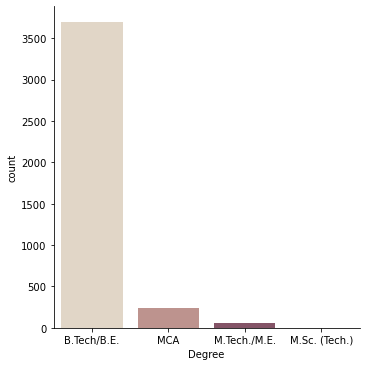

In [309]:
sns.catplot(x='Degree',kind="count", palette="ch:.25",data=categorical)

- About 93% of people among amcat aspirants are from B.tech/BE

# column: Specialization

In [310]:
categorical['Specialization'].value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
chemical engineering                             9
applied electronics and instrum

- No missing values but similar Specialization's are entered with diff names.
- Rename similar Specialization's to same name

In [311]:
specialization_map = {'electronics and communication engineering' : 'EC',
 'computer science & engineering' : 'CS',
 'information technology' : 'CS' ,
 'computer engineering' : 'CS',
 'computer application' : 'CS',
 'mechanical engineering' : 'ME',
 'electronics and electrical engineering' : 'EE',
 'electronics & telecommunications' : 'EC',
 'electrical engineering' : 'EE',
 'electronics & instrumentation eng' : 'EC',
 'civil engineering' : 'CE',
 'electronics and instrumentation engineering' : 'EC',
 'information science engineering' : 'CS',
 'instrumentation and control engineering' : 'EC',
 'electronics engineering' : 'EC',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'EC',
 'computer science and technology' : 'CS',
 'telecommunication engineering' : 'EC',
 'mechanical and automation' : 'ME',
 'automobile/automotive engineering' : 'ME',
 'instrumentation engineering' : 'EC',
 'mechatronics' : 'ME',
 'electronics and computer engineering' : 'CS',
 'aeronautical engineering' : 'ME',
 'computer science' : 'CS',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'EC',
 'electrical and power engineering' : 'EE',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CS',
 'embedded systems technology' : 'EC',
 'power systems and automation' : 'EE',
 'computer and communication engineering' : 'CS',
 'information science' : 'CS',
 'internal combustion engine' : 'ME',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'ME',
 'control and instrumentation engineering' : 'EC',
 'polymer technology' : 'other',
 'electronics' : 'EC'}

In [312]:
categorical['Specialization'] = categorical['Specialization'].map(specialization_map)
categorical['Specialization'].unique()

array(['CS', 'EC', 'ME', 'EE', 'CE', 'other'], dtype=object)

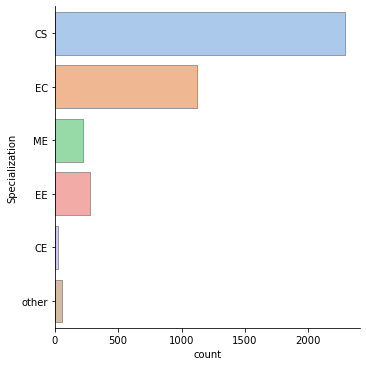

In [313]:
sns.catplot(y="Specialization", kind="count",palette="pastel", edgecolor=".6", data=categorical)

- We can observe most of the aspirants are from computer science engineering.
- Second highest from electronics and communication engineering

In [314]:
# combine numerical, categorical abd dt_col to form a final dataset
df_all=pd.concat([num,categorical,dt_col],axis=1,join="inner")

In [315]:
df_all.shape

(3998, 35)

# BIVARIATE ANALYSIS

<Figure size 1080x360 with 0 Axes>

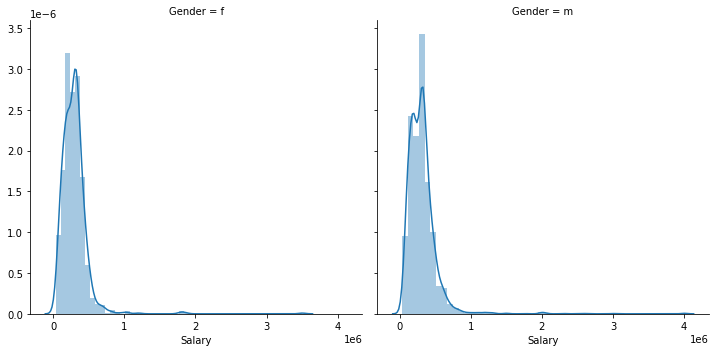

<function print>

In [316]:
plt.figure(figsize=(15,5))
colors = sns.color_palette('bright',n_colors=2)
sns.FacetGrid(df_all, col="Gender", size=5,palette=colors) \
   .map(sns.distplot, "Salary",bins=50) \
   .add_legend()
plt.show()
print

<Figure size 1080x360 with 0 Axes>

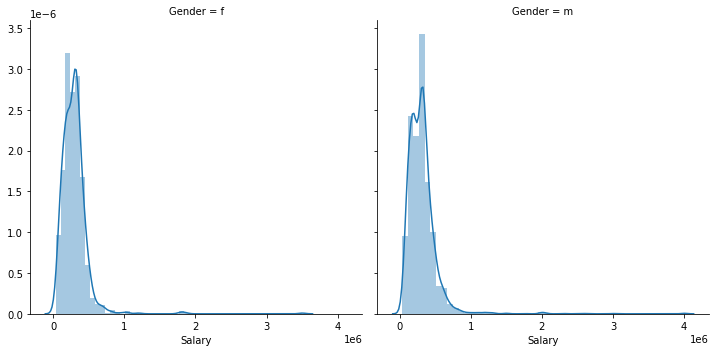

<function print>

In [317]:
plt.figure(figsize=(15,5))
colors = sns.color_palette('bright',n_colors=2)
sns.FacetGrid(df, col="Gender", size=5,palette=colors) \
   .map(sns.distplot, "Salary",bins=50) \
   .add_legend()
plt.show()
print

<AxesSubplot:xlabel='Salary', ylabel='Gender'>

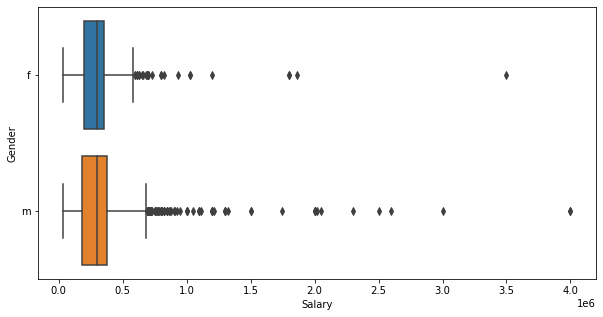

In [318]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Salary',y='Gender',data=df)

* There are many outliers in the salary data
* There is not much difference between median salary for both genders.
* Male have more outliers indicating they are more people getting higher pays in male than female category

In [319]:
num.columns

Index(['Salary', '10percentage', '12graduation', '12percentage', 'CollegeID',
       'CollegeTier', 'collegeGPA', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [320]:
categorical.columns

Index(['Designation', 'JobCity', 'Gender', '10board', '12board', 'Degree',
       'Specialization', 'CollegeState'],
      dtype='object')

Text(0.5, 0.98, 'Salary levels by specialization')

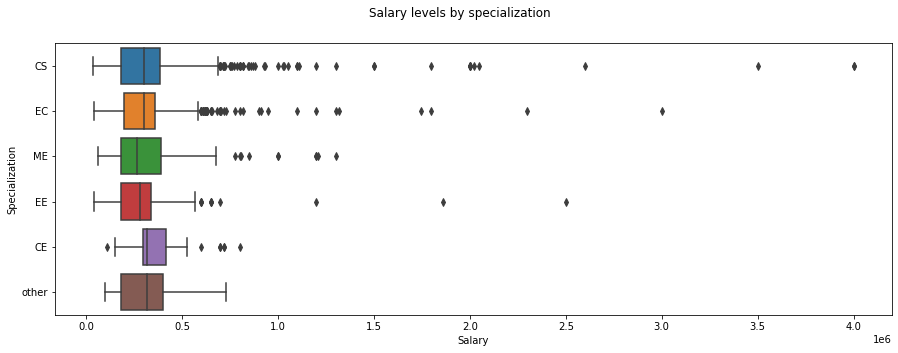

In [321]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['Salary'],y=df_all['Specialization'])
plt.suptitle('Salary levels by specialization')

In [322]:
top_Designations = df_all[df_all['Designation'].isin(df_all['Designation'].value_counts()[:20].index)]
print(f"Unique professions : {len(df_all['Designation'].unique())}")
top_Designations.head()

Unique professions : 418


,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Designation,JobCity,Gender,10board,12board,Degree,Specialization,CollegeState,DOJ,DOB,DOL
1,500000,85.40,2007,85.0,5807,2,70.06,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,assistant manager,Indore,m,cbse,cbse,B.Tech/B.E.,EC,Madhya Pradesh,2013-09-01,1989-10-04,2022-08-19 22:39:18.980972
2,325000,85.00,2010,68.2,64,2,70.00,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,systems engineer,Chennai,f,cbse,cbse,B.Tech/B.E.,CS,Uttar Pradesh,2014-06-01,1992-08-03,2022-08-19 22:39:18.980972
3,1100000,85.60,2007,83.6,6920,1,74.64,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,senior software engineer,Gurgaon,m,cbse,cbse,B.Tech/B.E.,CS,Delhi,2011-07-01,1989-12-05,2022-08-19 22:39:18.980972
4,200000,78.00,2008,76.8,11368,2,73.90,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,system engineer,Manesar,m,cbse,cbse,B.Tech/B.E.,EC,Uttar Pradesh,2014-03-01,1991-02-27,2015-03-01 00:00:00.000000
5,300000,89.92,2010,87.0,5086,2,76.32,2014,560,555,620,-1.000000,645,-1,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608,system engineer,Hyderabad,m,state board,state board,B.Tech/B.E.,EC,Karnataka,2014-06-01,1992-07-02,2022-08-19 22:39:18.980972


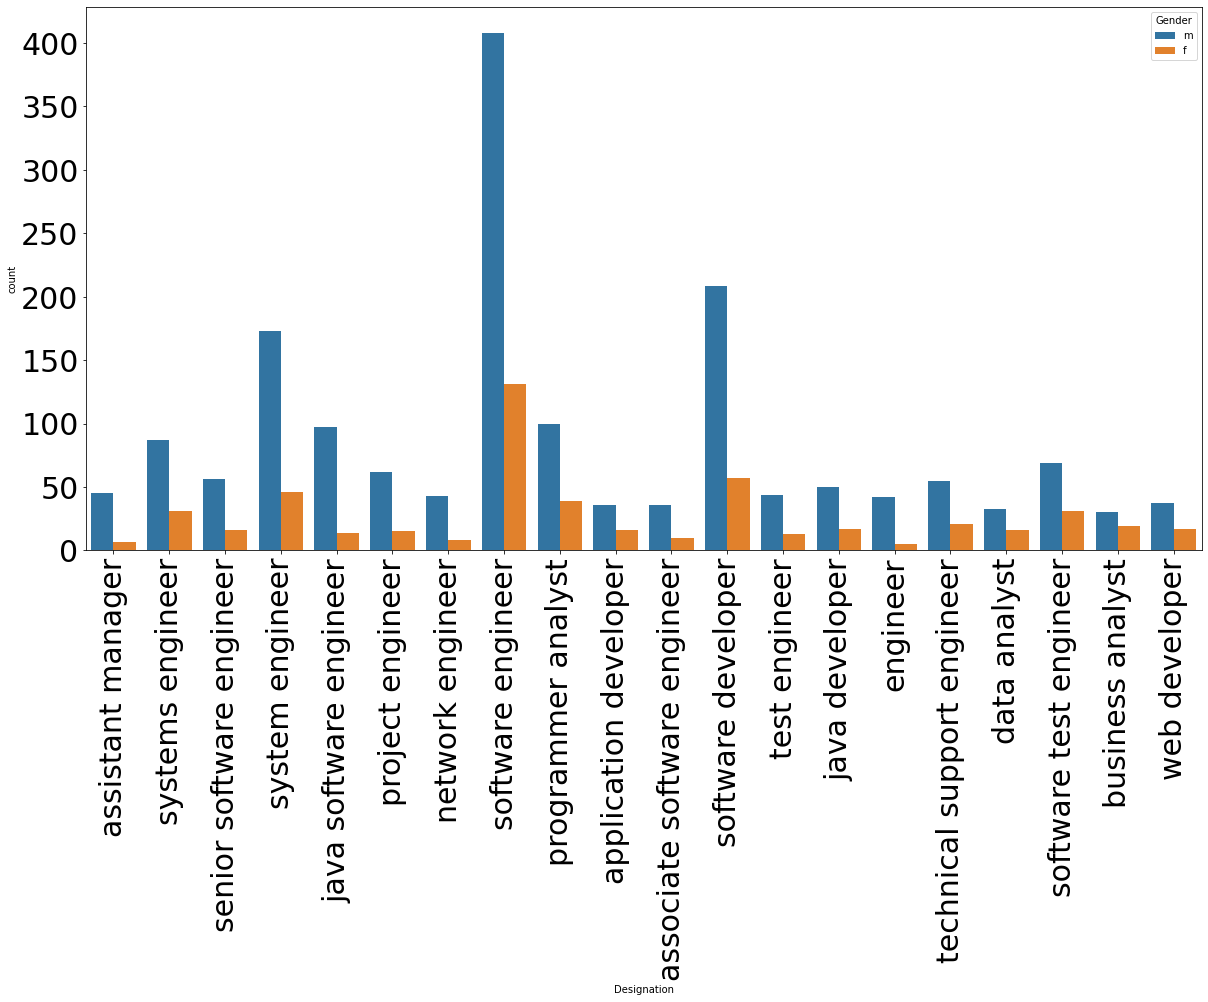

In [323]:
plt.figure(figsize=(20,10))
sns.countplot(x='Designation',hue='Gender',data=top_Designations)
plt.xticks(fontsize=30,rotation=90)
plt.yticks(fontsize=30)
plt.show()

- Most of the roles are of IT Domain.
- Many amcat aspirats are specialized in CS/EC. That might be the reason
- Most of the job holders are men

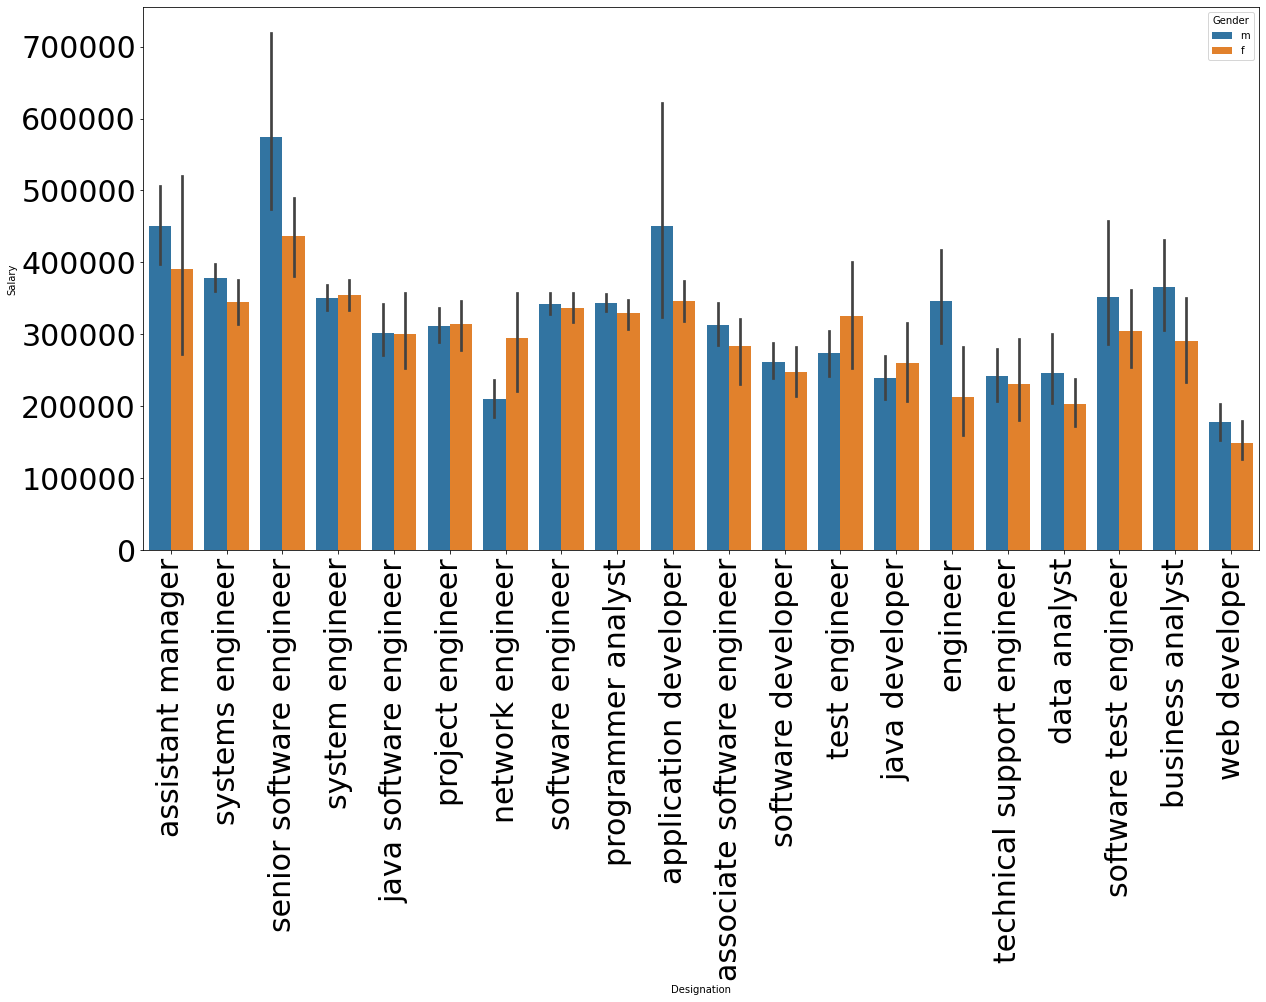

In [324]:
plt.figure(figsize=(20,10))
sns.barplot(x='Designation',y='Salary',hue='Gender',data=top_Designations)
plt.xticks(fontsize=30,rotation=90)
plt.yticks(fontsize=30)
plt.show()

* mean salary of top most frequent roles is nearly independent of gender.
* there is some considerable difference in some roles.but we cannot be sure that women is being paid less in that role
* it might be due to experience,specialization etc.`

In [331]:
# high paying designations and their relation with respect to gender
high = list(df_all.sort_values("Salary",ascending=False)["Designation"].unique())[:20]
high_pay = df_all[df_all['Designation'].isin(high)]
high_pay.head()


,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Designation,JobCity,Gender,10board,12board,Degree,Specialization,CollegeState,DOJ,DOB,DOL
3,1100000,85.60,2007,83.60,6920,1,74.64,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.4078,-0.9194,senior software engineer,Gurgaon,m,cbse,cbse,B.Tech/B.E.,CS,Delhi,2011-07-01,1989-12-05,2022-08-19 22:39:18.980972
6,300000,86.08,2010,67.50,314,2,72.98,2014,590,435,380,0.356536,405,-1,346,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.0092,-1.0872,java software engineer,Bengaluru,m,state board,state board,B.Tech/B.E.,CS,Karnataka,2014-08-01,1993-02-01,2015-05-01 00:00:00.000000
14,300000,81.20,2008,79.90,64,2,67.67,2013,395,565,645,-1.000000,495,-1,376,-1,-1,-1,-1,0.7027,0.7119,0.0100,-0.9950,0.6721,java software engineer,Bengaluru,m,state board,state board,B.Tech/B.E.,EC,Uttar Pradesh,2013-07-01,1992-07-02,2022-08-19 22:39:18.980972
19,325000,79.00,2008,62.20,7977,2,76.30,2012,485,445,435,0.864685,525,-1,-1,-1,-1,-1,-1,0.8192,0.2668,-0.2714,-0.4078,-0.1295,software engineer,Pune,f,cbse,cbse,B.Tech/B.E.,CS,Uttar Pradesh,2014-09-01,1990-11-30,2022-08-19 22:39:18.980972
20,320000,91.20,2006,84.63,4437,2,78.15,2010,455,535,445,0.635979,445,-1,-1,-1,-1,-1,-1,-0.1082,0.9688,0.5269,-0.2902,0.3444,software engineer,Bengaluru,f,karnataka secondary school of examination,karnataka pre university board,B.Tech/B.E.,CS,Karnataka,2010-11-01,1988-07-25,2012-09-01 00:00:00.000000


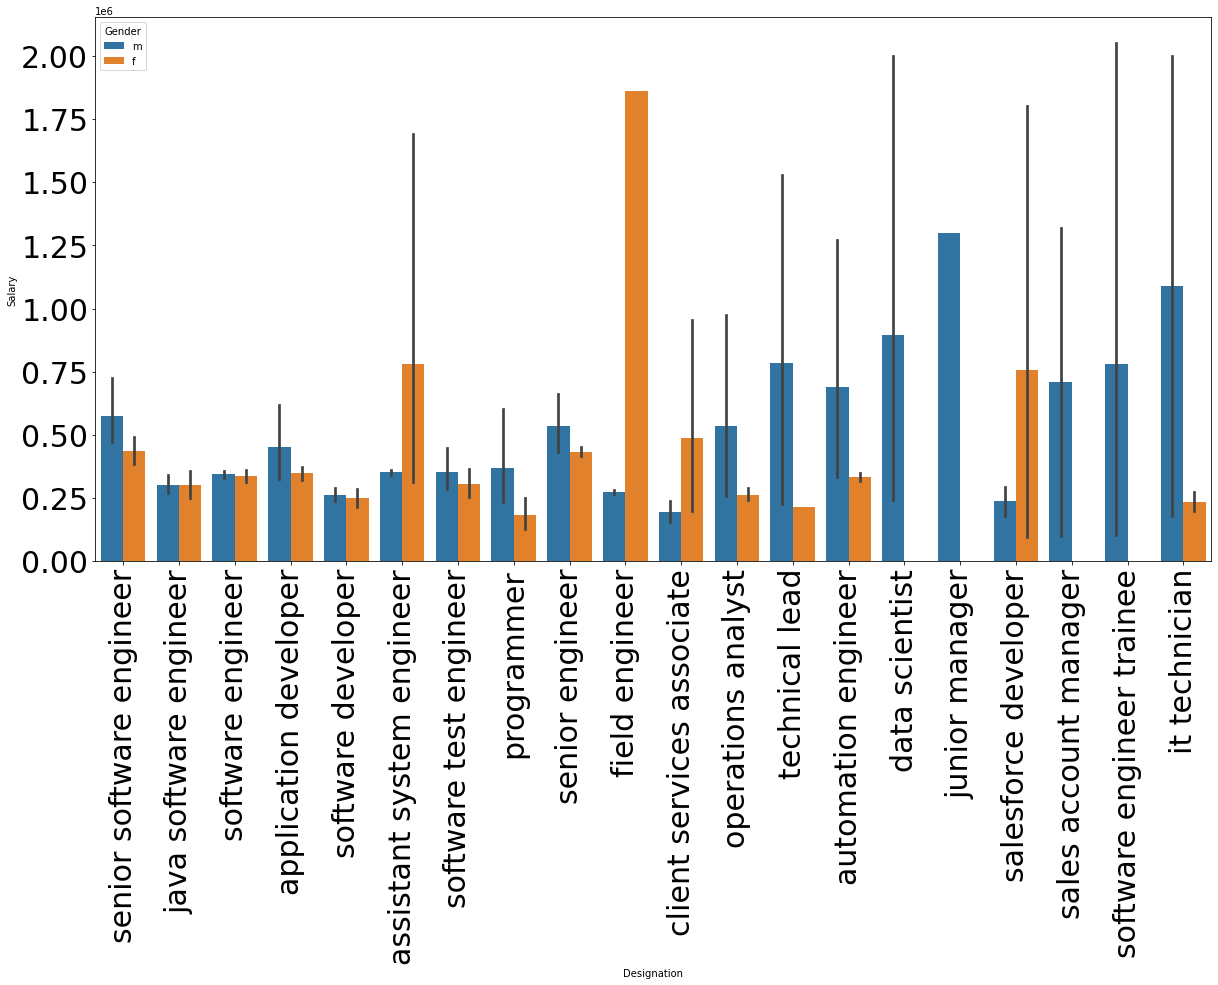

In [332]:
plt.figure(figsize=(20,10))
sns.barplot(x='Designation',y='Salary',hue='Gender',data=high_pay)
plt.xticks(fontsize=30,rotation=90)
plt.yticks(fontsize=30)
plt.show()

* Most of the high paying jobs are from IT domain.
* men are paid higher compared to women.
* In 20% of top paying roles,women are paid higher than men
* In roles like junior manager,sales account manager,software engineer trainee there are no women working in these fields.
* Junior manager is highest paying for men and field engineer is the highest paying role for women.
* The disperancy between pay based on gender might be because of other features like experience,specialization etc.
* Software Enginner and Software developer are most frequent and highest paying jobs

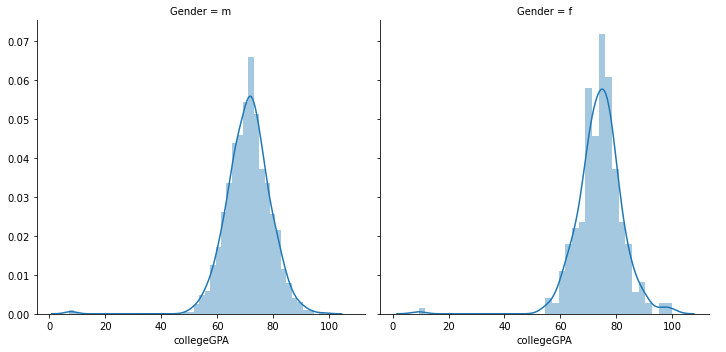

In [333]:
### Now let us check relation with collegegpa
### first check the distribution of gpa 
sns.FacetGrid(data=high_pay,col='Gender',size=5) \
    .map(sns.distplot,'collegeGPA') \
    .add_legend()

- Male and female dist are similar for collegeGPA
- Most of the people have CGPA between 60% - 75%

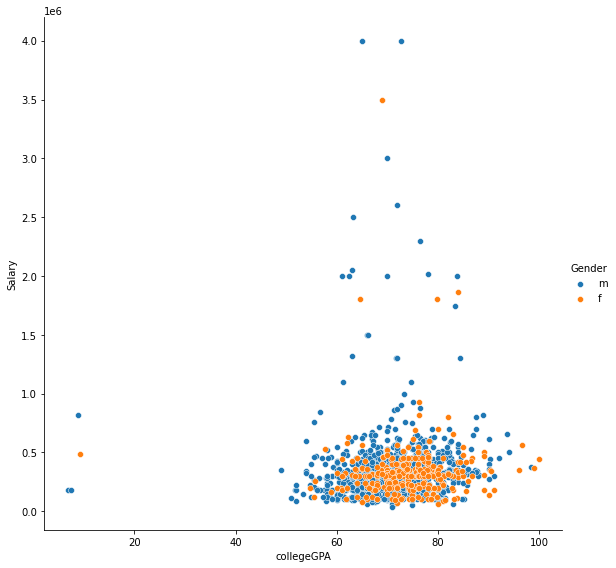

In [334]:
sns.FacetGrid(data=high_pay,hue='Gender',size=8) \
    .map(sns.scatterplot,'collegeGPA','Salary') \
    .add_legend()

- Salaries and CGPA of both M/F are overlapping highly.
- we can Conclude that CGPA is not affecting the salaries.

<AxesSubplot:xlabel='Specialization', ylabel='Salary'>

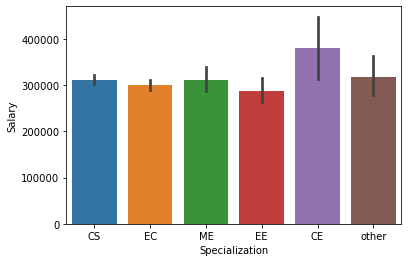

In [335]:
sns.barplot(data=df_all,x='Specialization',y='Salary')

- Aspirants from Civil Engineering are earning more avg salary compared to other branches.
- Remaining all earning almost in similar range.

<AxesSubplot:xlabel='Specialization', ylabel='Salary'>

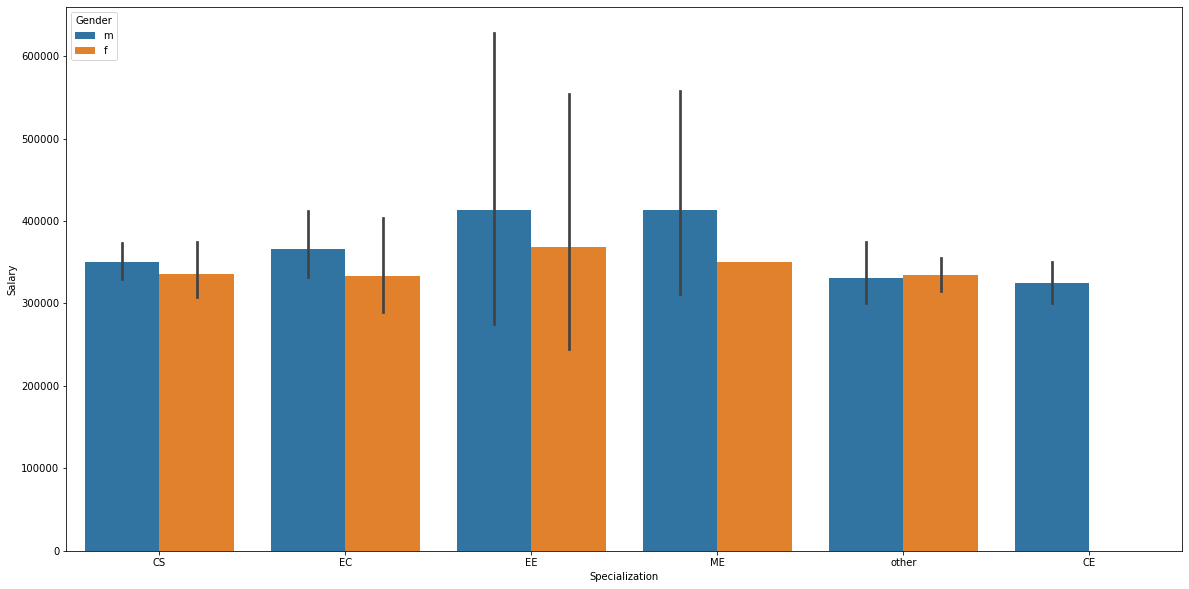

In [336]:
# for the dataset containing Highpaying Jobs
plt.figure(figsize=(20,10))
sns.barplot(data=high_pay,x='Specialization',y='Salary',hue='Gender')

* This is for the people who have higher pays
* From the CE Specialization,Only men are taking up higher pay jobs.
* Specialization is not reason for women being paid less. Most of the women are from CS branch and there they are earning almost similar to men.
* Mostly specialization is not the reason for women being paid less.

<AxesSubplot:xlabel='CollegeTier', ylabel='Salary'>

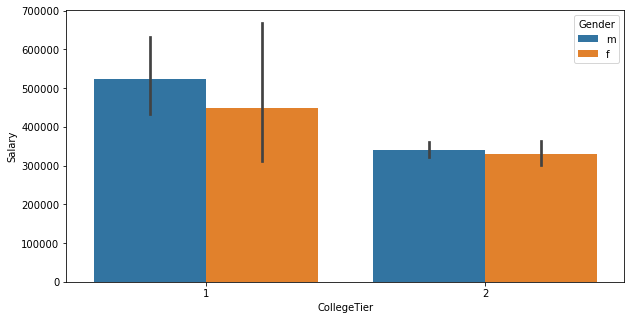

In [337]:
### Lets us check salary with the College Tier
plt.figure(figsize=(10,5))
sns.barplot(data=high_pay,x='CollegeTier',y='Salary',hue='Gender')

- From the above graph, students from Tier-1 colleges are earning more.
- More men are from Tier-1 colleges.
- Men and women are almost equal from Tier-2 colleges.

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

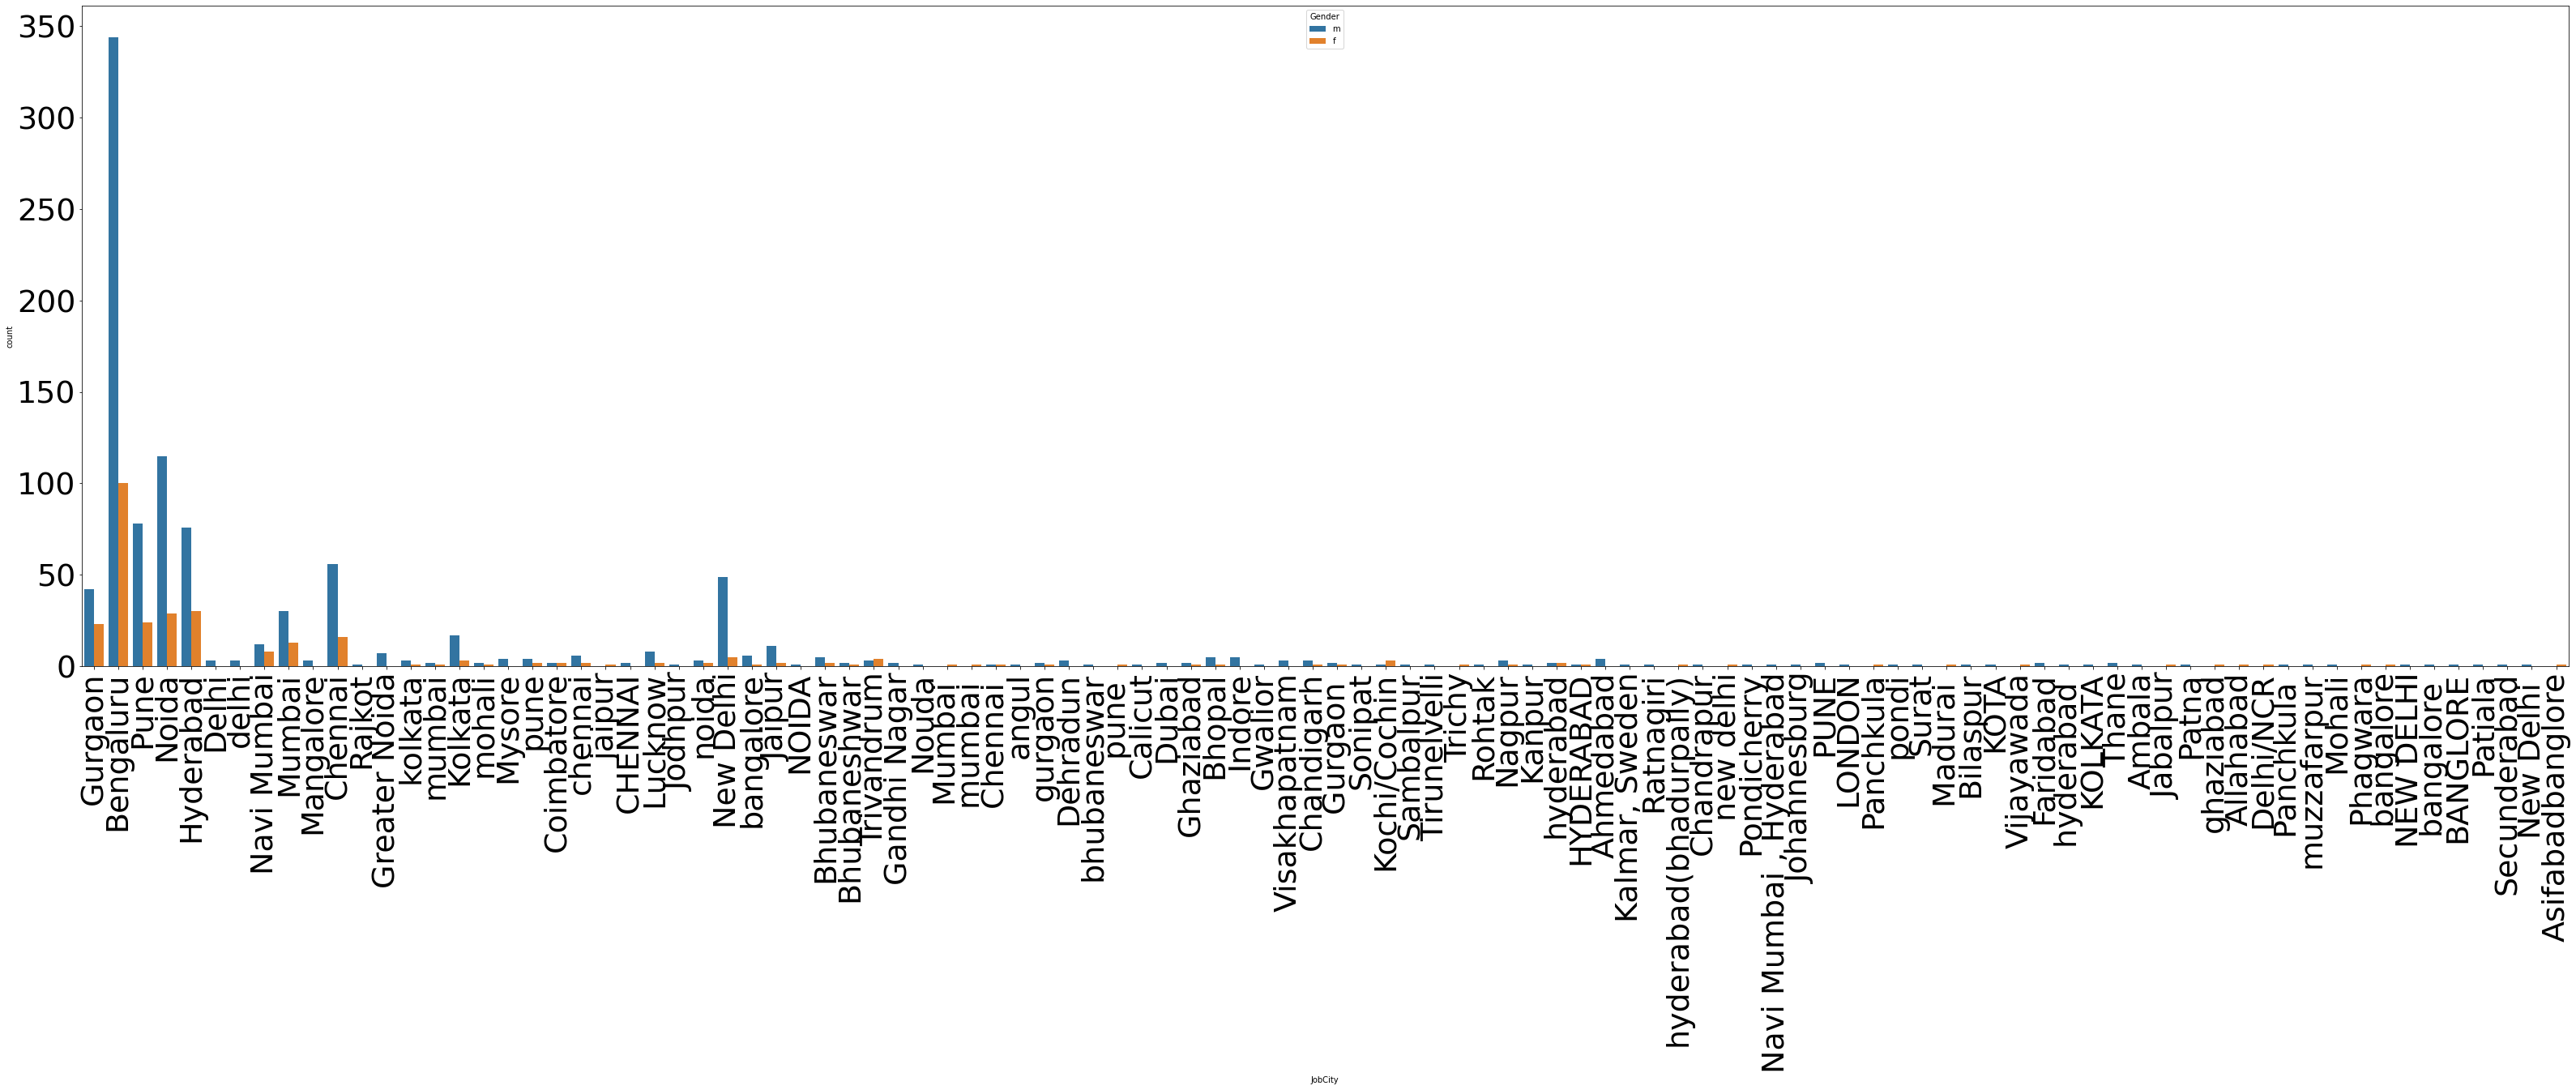

In [338]:
plt.figure(figsize=(55,15))
sns.countplot(x="JobCity",data=high_pay,hue="Gender")
plt.xticks(fontsize=38,rotation=90)
plt.yticks(fontsize=38)

- Most of the high paying aspirants work in Benguluru, Hyderabd, Noida and Pune.
- Reason being most of them are from IT Domain.

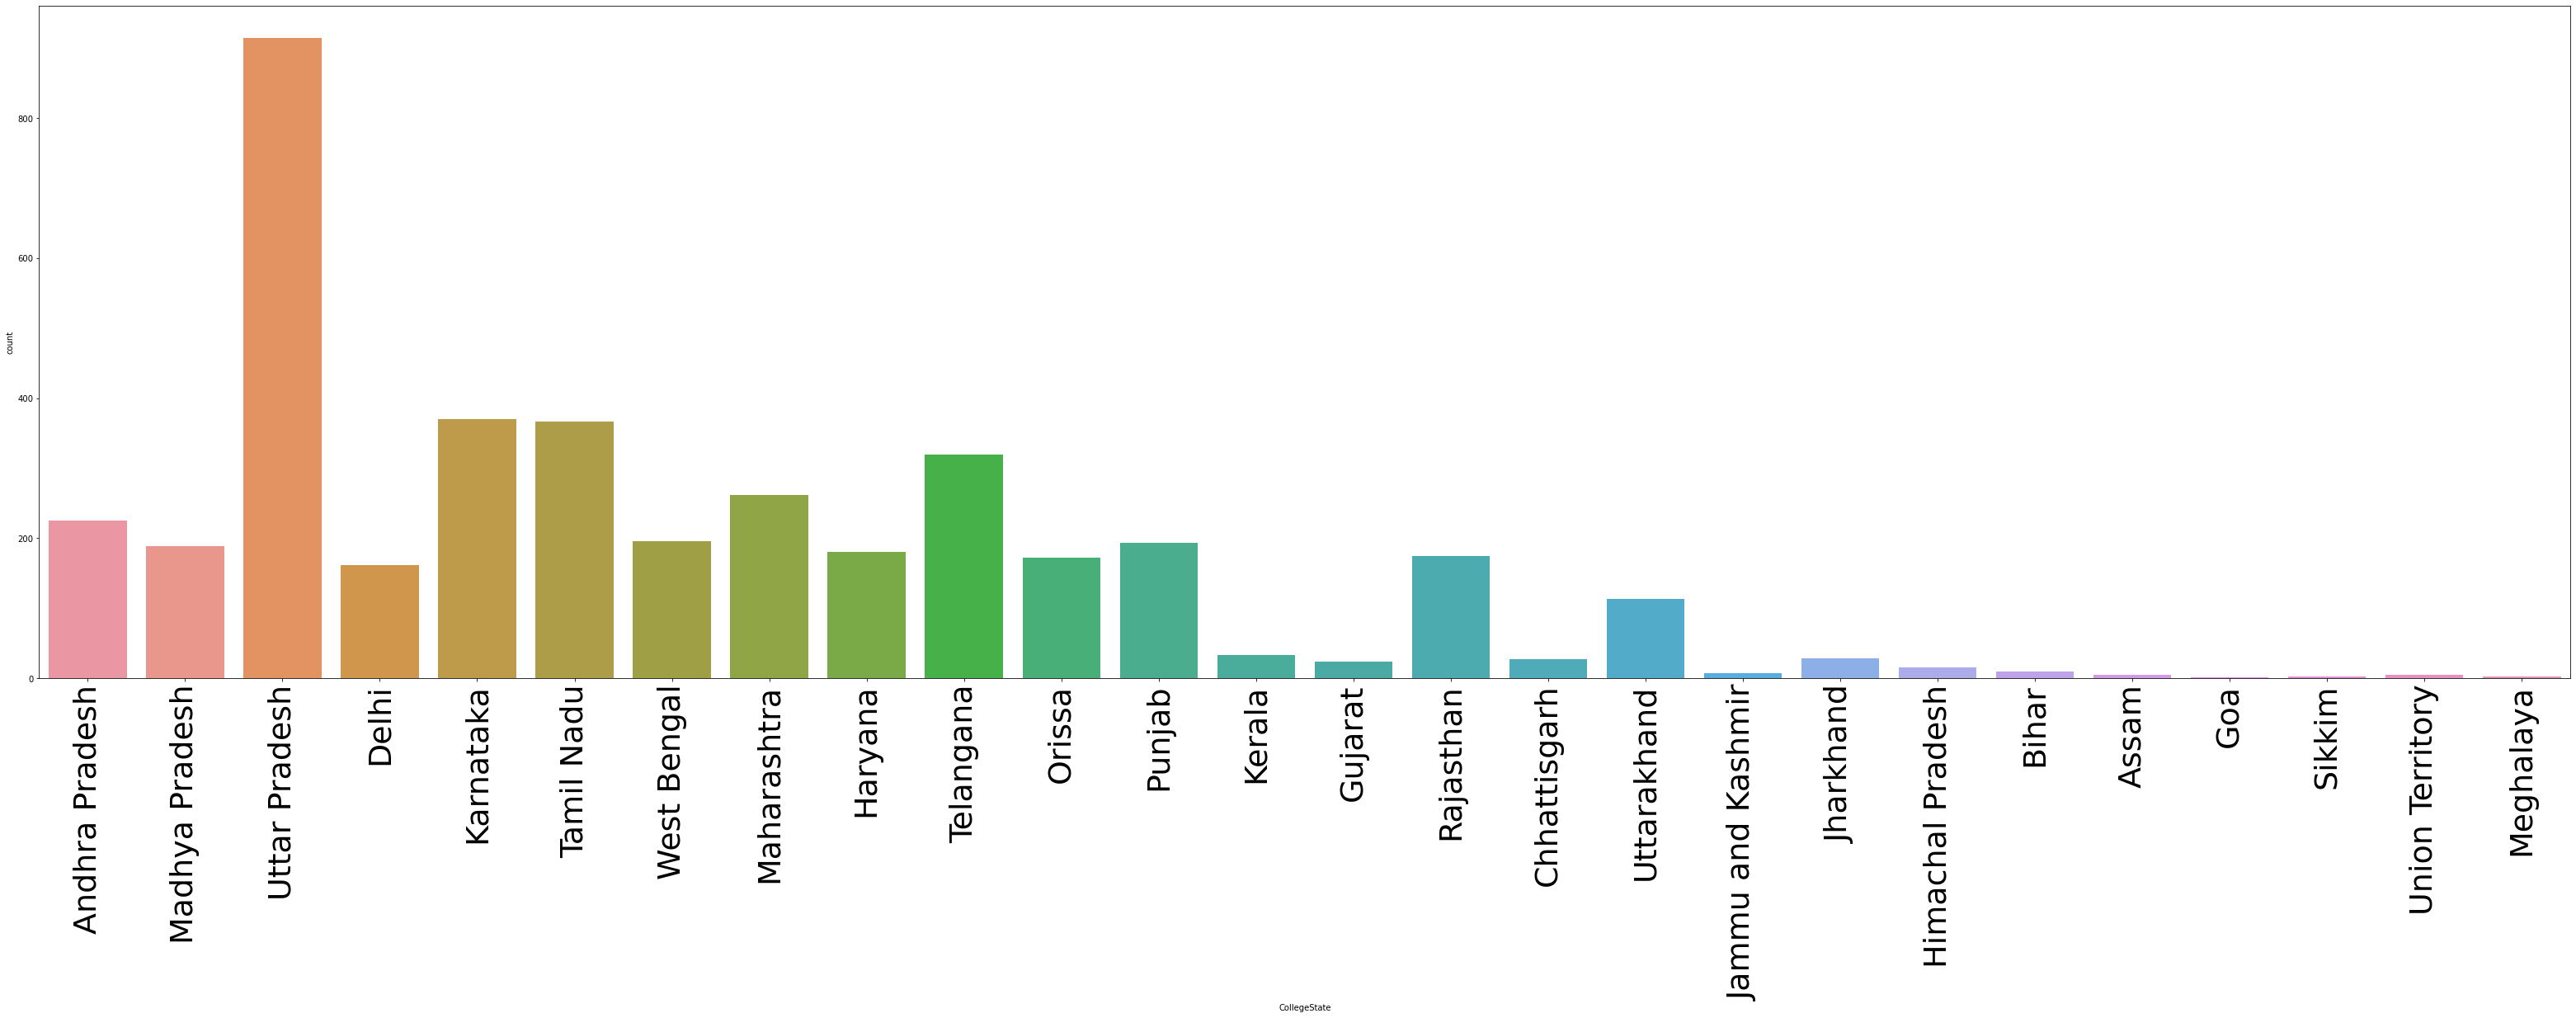

In [340]:
plt.figure(figsize=(55,15))
sns.countplot(data=df_all,x='CollegeState')
plt.xticks(fontsize=38,rotation=90)
plt.show()

### Overall Conclusions:
- 1. Most of Amcat Aspirants are male working in IT domain with degree in Btech and specialization in Computer Science/Information Technology 
- 2. Highest no of graduates are from experience of around 5years 
- 3. Highpaying jobs taken up by amcat aspirants are mostly from 'IT' Domain.
- 4. Average salary around is around 300k.  
- 5. Software Engineer and Software Developer are the most aimed profession for amcat aspirants.


# TimesOfIndia claims

<AxesSubplot:xlabel='Designation', ylabel='Salary'>

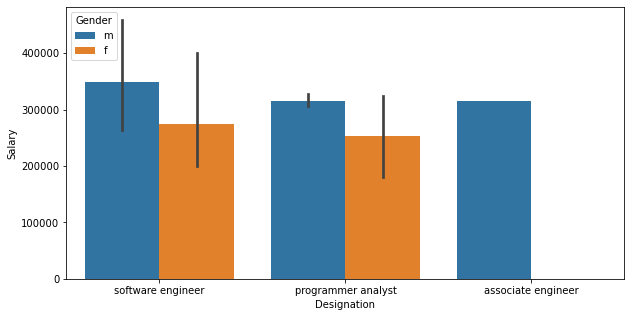

In [354]:
new=df_all[(df_all["Designation"].isin(["programmer analyst","software engineer","hardware engineer","associate engineer"])) & (df_all['DOJ'].dt.year==2015)]
plt.figure(figsize=(10,5))
sns.barplot(x="Designation",y="Salary",hue="Gender",data=new)


- For Freshers,the salary is starting from 200k and male are earing more than female as a fresher.
- Most of them are Software Engineers, Programmer analyst.
- No Females as associate Engineer

# As Visualization is done, we can go for outlier analysis and removal

- As per Standard normal distribution, 99.7% of data falls in range of 3 standard deviations.
- 68% falls between one standard deviations and 95% between 2 standard deviations.
- The data outside this range os considered as outliers

In [359]:
num_1 = num

In [360]:
num_1.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,300165.832916,77.944652,2008.093297,74.480788,5149.836618,1.925713,71.612344,2012.610305,501.629065,501.777139,513.374437,0.510474,352.764132,95.060780,90.163832,22.307654,15.842671,31.435218,1.121061,-0.033410,0.156248,0.007296,-0.171238,-0.123594
std,152669.192291,9.746935,1.610122,10.926041,4784.435924,0.262270,7.325613,1.284310,103.645591,85.481533,120.158403,0.468655,204.763526,157.504985,173.575241,94.683000,83.611232,103.071502,20.595446,1.012352,0.896674,0.924285,0.992608,0.940632
min,75000.000000,52.000000,2003.000000,50.000000,29.000000,1.000000,54.750000,2010.000000,285.000000,295.000000,234.700000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-2.744300,-2.775400,-2.451257,-2.290948,-3.351800
1%,75000.000000,52.000000,2003.000000,50.000000,29.000000,1.000000,54.750000,2010.000000,285.000000,295.000000,234.991000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-2.744300,-2.775400,-2.449165,-2.287991,-3.351800
5%,100000.000000,59.970000,2005.000000,56.800000,55.000000,1.000000,60.000000,2010.000000,335.000000,355.000000,310.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.882500,-1.527300,-1.680700,-1.756125,-1.820235
10%,120000.000000,64.000000,2006.000000,60.400000,124.000000,2.000000,62.000000,2011.000000,365.000000,385.000000,355.000000,0.112139,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.451700,-0.953100,-1.219600,-1.502100,-1.244000
25%,180000.000000,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,2012.000000,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,300000.000000,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,370000.000000,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,2014.000000,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400


### Capping and Flooring of outliers

In [361]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [362]:
num_1=num_1.apply(lambda x : outlier_cap(x))

In [363]:
num_1.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,300160.010005,77.944640,2008.093297,74.480788,5149.833998,1.925713,71.612344,2012.610305,501.629065,501.777139,513.375893,0.510474,352.764132,95.060780,90.163832,22.307654,15.842671,31.435218,1.103592,-0.033410,0.156248,0.007281,-0.171208,-0.123594
std,152645.150166,9.746916,1.610122,10.926041,4784.429687,0.262270,7.325613,1.284310,103.645591,85.481533,120.148238,0.468655,204.763526,157.504985,173.575241,94.683000,83.611232,103.071502,20.425220,1.012352,0.896674,0.924157,0.992545,0.940632
min,75000.000000,52.000000,2003.000000,50.000000,29.000000,1.000000,54.750000,2010.000000,285.000000,295.000000,234.991000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-2.744300,-2.775400,-2.449165,-2.287991,-3.351800
1%,75000.000000,52.000000,2003.000000,50.000000,29.000000,1.000000,54.750000,2010.000000,285.000000,295.000000,234.999730,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-2.744300,-2.775400,-2.449102,-2.287903,-3.351800
5%,100000.000000,59.970000,2005.000000,56.800000,55.000000,1.000000,60.000000,2010.000000,335.000000,355.000000,310.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.882500,-1.527300,-1.680700,-1.756125,-1.820235
10%,120000.000000,64.000000,2006.000000,60.400000,124.000000,2.000000,62.000000,2011.000000,365.000000,385.000000,355.000000,0.112139,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.451700,-0.953100,-1.219600,-1.502100,-1.244000
25%,180000.000000,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,2012.000000,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,300000.000000,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,370000.000000,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,2014.000000,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400


- Here all the values above 99% quantile are capped with 99 pertile value.
- Simmilarly, the values below 1% are capped with 1 percentile value.